In [35]:
# -*- coding: utf-8 -*-
"""
Created on Tue April 25 12:00:05 2020

@author: Ayushi Tiwari
"""

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import nan
import sklearn
import matplotlib.pyplot as plt

airline_passengers_raw_data = df4 = pd.read_csv('ait582-proj-data.csv')

'Count the number of missing values for each column'

airline_passengers_raw_data.head()

,CUSTOMERID,SUCCESS,DESCRIPTION,SEATCLASS,GUESTS,FARE
0,1,0,"Braund, Mr. Owen Harris;22",3,1,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,71.2833
2,3,1,"Heikkinen, Miss. Laina;26",3,0,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel);35",1,1,53.1000
4,5,0,"Allen, Mr. William Henry;35",3,0,8.0500


In [36]:
airline_passengers_raw_data.describe()

,CUSTOMERID,SUCCESS,SEATCLASS,GUESTS,FARE
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,32.204208
std,257.353842,0.486592,0.836071,1.102743,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,512.329200


In [54]:
airline_passengers_data =pd.read_csv('ait582-airline-data.csv')

In [55]:
airline_passengers_data.describe()

,CUSTOMERID,SUCCESS,AGE,SEATCLASS,GUESTS,FARE
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,2.308642,0.523008,32.204208
std,257.353842,0.486592,14.526497,0.836071,1.102743,49.693429
min,1.000000,0.000000,0.420000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,2.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,3.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,3.000000,1.000000,31.000000
max,891.000000,1.000000,80.000000,3.000000,8.000000,512.329200


In [56]:
airline_passengers_data.head()

,CUSTOMERID,SUCCESS,DESCRIPTION,AGE,GENDER,SEATCLASS,GUESTS,FARE
0,1,0,"Braund, Mr. Owen Harris",22.0,M,3,1,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,F,1,1,71.2833
2,3,1,"Heikkinen, Miss. Laina",26.0,F,3,0,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,F,1,1,53.1000
4,5,0,"Allen, Mr. William Henry",35.0,M,3,0,8.0500


In [49]:
from sklearn.impute import SimpleImputer
# replace '' values with 'nan'
airline_passengers_data[['AGE']] = airline_passengers_data[['AGE']].replace('', nan)
# count the number of nan values in each column
print(airline_passengers_data['AGE'].isnull().sum())

177


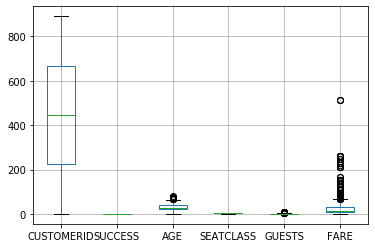

In [7]:
airline_passengers_data.boxplot()

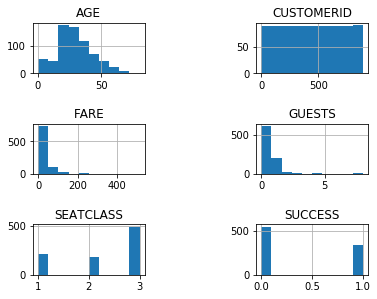

In [8]:
airline_passengers_data.hist()
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=1, hspace=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161D13BF748>,
      dtype=object)

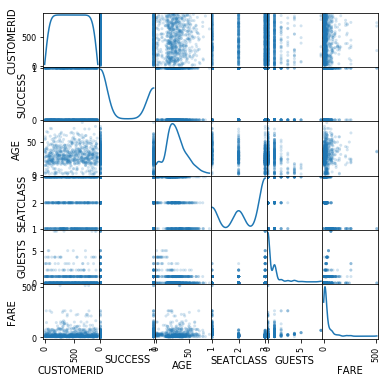

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(airline_passengers_data, alpha=0.2, figsize=(6, 6), diagonal='kde')


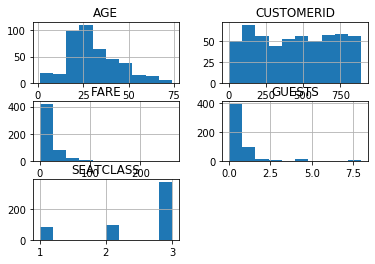

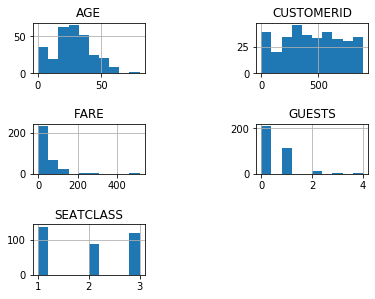

In [10]:
airline_passengers_data.groupby('SUCCESS').hist()
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=1, hspace=1)


In [151]:
# replace missing values for "Age" with the column mean
df_mean_imputed = airline_passengers_data.fillna(airline_passengers_data.mean())
df_median_imputed = airline_passengers_data.fillna(airline_passengers_data.median())
df_mean_imputed.describe()

,CUSTOMERID,SUCCESS,AGE,SEATCLASS,GUESTS,FARE
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,2.308642,0.523008,32.204208
std,257.353842,0.486592,13.002015,0.836071,1.102743,49.693429
min,1.000000,0.000000,0.420000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,2.000000,0.000000,7.910400
50%,446.000000,0.000000,29.699118,3.000000,0.000000,14.454200
75%,668.500000,1.000000,35.000000,3.000000,1.000000,31.000000
max,891.000000,1.000000,80.000000,3.000000,8.000000,512.329200


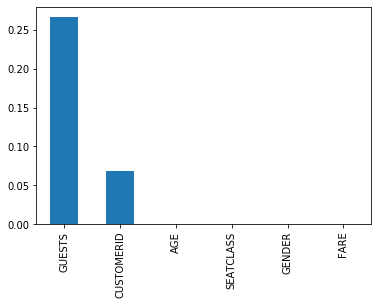

In [88]:
# Apply label encoder for 'GENDER' and 'GUETS' and select top two features using Chi-square test
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_mean_imputed['GENDER'] = label_encoder.fit_transform(df_mean_imputed['GENDER'])
df_mean_imputed['GUESTS'] = label_encoder.fit_transform(df_mean_imputed['GUESTS'])

Z=df_mean_imputed.drop(['DESCRIPTION','dummyCat','SUCCESS'],axis=1)
w = df_mean_imputed['SUCCESS']
chi_scores = chi2(Z,w)
chi_scores
p_values = pd.Series(chi_scores[1],index = Z.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


In [60]:
#chi square test for feature selection

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df_mean_imputed['dummyCat'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])
#Initialize ChiSquare Class
cT = ChiSquare(df_mean_imputed)
#Feature Selection
testColumns = ['CUSTOMERID', 'DESCRIPTION', 'AGE', 'SEATCLASS', 'GUESTS', 'FARE','GENDER','dummyCat']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SUCCESS" )  

CUSTOMERID is NOT an important predictor. (Discard CUSTOMERID from model)
DESCRIPTION is NOT an important predictor. (Discard DESCRIPTION from model)
AGE is IMPORTANT for Prediction
SEATCLASS is IMPORTANT for Prediction
GUESTS is IMPORTANT for Prediction
FARE is IMPORTANT for Prediction
GENDER is IMPORTANT for Prediction
dummyCat is NOT an important predictor. (Discard dummyCat from model)


In [14]:
df_mean_imputed1=df_mean_imputed[['AGE','SEATCLASS','GUESTS','FARE','SUCCESS']]
df_mean_imputed1

,AGE,SEATCLASS,GUESTS,FARE,SUCCESS
0,22.000000,3,1,7.2500,0
1,38.000000,1,1,71.2833,1
2,26.000000,3,0,7.9250,1
3,35.000000,1,1,53.1000,1
4,35.000000,3,0,8.0500,0
...,...,...,...,...,...
886,27.000000,2,0,13.0000,0
887,19.000000,1,0,30.0000,1
888,29.699118,3,1,23.4500,0
889,26.000000,1,0,30.0000,1


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_mean_imputed1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-25.148215,-7.071674
1,39.292813,7.298874
2,-24.371676,-3.074181
3,21.039376,4.769686
4,-24.017957,5.919603
...,...,...
886,-19.266157,-2.184088
887,-2.466454,-10.601910
888,-8.756564,0.204314
889,-2.286571,-3.607021


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['-0.789272','1.266990']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SUCCESS'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [90]:
# distributing the dataset into two components X and Y 
X = df_mean_imputed1.iloc[:, 0:4].values 
y = df_mean_imputed1.iloc[:, 4].values 

# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [91]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [92]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.42123239, 0.30426361])

In [93]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(X_test) 

In [95]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 
cm

array([[100,  10],
       [ 44,  25]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


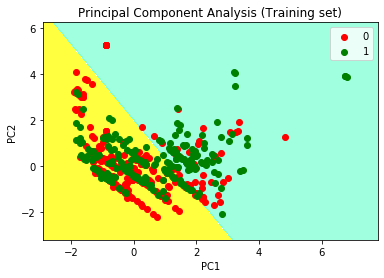

In [98]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Principal Component Analysis (Training set)')
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


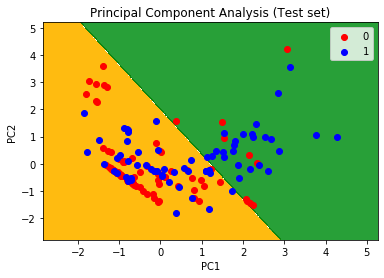

In [99]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('orange', 'white', 'green')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'blue', 'black'))(i), label = j) 
  
# title for scatter plot 
plt.title('Principal Component Analysis (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show() 

In [25]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6871508379888268


In [148]:
from sklearn.preprocessing import LabelEncoder
df_mean_imputed1=df_mean_imputed[['AGE','SEATCLASS','GUESTS','FARE','GENDER','SUCCESS']]

label_encoder = LabelEncoder()
df_mean_imputed1['GENDER'] = label_encoder.fit_transform(df_mean_imputed['GENDER'])
df_mean_imputed1['GUESTS'] = label_encoder.fit_transform(df_mean_imputed['GUESTS'])
P = df_mean_imputed1.drop('SUCCESS', axis=1)
r = df_mean_imputed1['SUCCESS']

# Perform k-fold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
#The final preprocessing step is to divide our data into training and test sets. 
#The model_selection library of Scikit-Learn contains train_test_split method, which we'll use to randomly split the data into training and testing sets.

from sklearn.model_selection import train_test_split
P_train, P_test, r_train, r_test = train_test_split(P, r, test_size=0.20)

#In the code above, the test_size parameter specifies the ratio of the test set, 
#which we use to split up 20% of the data in to the test set and 80% for training.

In [145]:
#Since we are going to perform a classification task here, we will use the DecisionTreeClassifier class for this example. 
#The fit method of this class is called to train the algorithm on the training data, 
#which is passed as parameter to the fit method. Execute the following script to train the algorithm:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(P_train, r_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
#Now that our classifier has been trained, let's make predictions on the test data. To make predictions, 
#the predict method of the DecisionTreeClassifier class is used. Take a look at the following code for usage:

r_pred = classifier.predict(P_test)

In [131]:
#At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. 
#For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. 
#Lucky for us Scikit=-Learn's metrics library contains the classification_report and confusion_matrix 
#methods that can be used to calculate these metrics for us:


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(r_test, r_pred))
print(classification_report(r_test, r_pred))


#From the confusion matrix, we can see that out of 179 test instances, our algorithm misclassified only 30. This is 83 % accuracy.

[[93 15]
 [15 56]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       108
           1       0.79      0.79      0.79        71

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [128]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(P_train,r_train)

r_pred=clf.predict(P_test)

In [129]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(r_test, r_pred))

Accuracy: 0.8324022346368715


In [130]:
clf.predict([[33,3,2,800,1]])

array([0], dtype=int64)

Count the number of missing values for each column


C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated

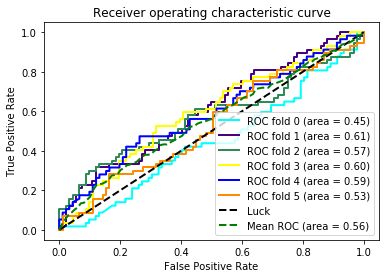

In [132]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# import some data to play with

X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()